Packages

In [87]:
#modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras

#configuration
pd.set_option('display.max_columns', None)

Extracting Data from csvs and turning into Pandas Data frame

In [88]:
oil = pd.read_csv("data/oil.csv")
holidays = pd.read_csv("data/holidays_events.csv")
stores = pd.read_csv("data/stores.csv")
test = pd.read_csv("data/test.csv")
train = pd.read_csv("data/train.csv")
transactions = pd.read_csv("data/transactions.csv")

transactions.sort_values(['store_nbr', 'date'])

,date,store_nbr,transactions
1,2013-01-02,1,2111
47,2013-01-03,1,1833
93,2013-01-04,1,1863
139,2013-01-05,1,1509
185,2013-01-06,1,520
...,...,...,...
83271,2017-08-11,54,768
83325,2017-08-12,54,903
83379,2017-08-13,54,1054
83433,2017-08-14,54,818


Convert date columns in dataframe to date time format

In [89]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
holidays['date'] = pd.to_datetime(holidays['date'])
transactions['date'] = pd.to_datetime(transactions['date'])
oil['date'] = pd.to_datetime(oil['date'])

Check for NaN Values

In [90]:
print(oil.isna().sum())
print(holidays.isna().sum())
print(stores.isna().sum())
print(test.isna().sum())
print(train.isna().sum())
print(transactions.isna().sum())

date           0
dcoilwtico    43
dtype: int64
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
date            0
store_nbr       0
transactions    0
dtype: int64


Print Oil data frame and replace NaN values with next day oil price

        date  dcoilwtico
0 2013-01-01       93.14
1 2013-01-02       93.14
2 2013-01-03       92.97
3 2013-01-04       93.12
4 2013-01-07       93.20
1218


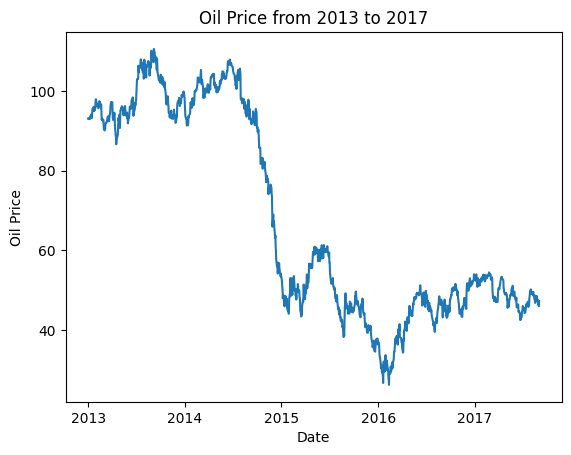

In [91]:
oil["dcoilwtico"] = oil["dcoilwtico"].interpolate(limit_direction="both")
print(oil.head())
print(len(oil))
oil = oil.set_index("date")
plt.plot(oil)
plt.title("Oil Price from 2013 to 2017")
plt.xlabel("Date")
plt.ylabel("Oil Price")
plt.show()

Merge data frames into one training dataframe with oil prices, holidays, transactions and stores for training


In [94]:
training = pd.merge(train, oil, how = 'left', on='date')
training = pd.merge(training, holidays, how = 'left',on = 'date')
training = pd.merge(training, transactions, how ='left', on =['date','store_nbr'])
training = pd.merge(training, stores, how = 'left', on = 'store_nbr')

training.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,locale,locale_name,description,transferred,transactions,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
